# NetCDF Examples

In [1]:
import igrat
import numpy as np

In [3]:
# Parse the data for station USM00072402 and save to a .csv file.
data = igrat.read_station_data("USM00072435", file_type="netcdf")
print(np.min(np.array(data['date'])), np.max(np.array(data['date'])))
data.info()

data = igrat.filter_by_date_range(data, 19880101, 19900131)
print(np.min(np.array(data['date'])), np.max(np.array(data['date'])))

Extracting data for station USM00072435...
Successfully downloaded and extracted data for USM00072435
Found 4390 soundings with maximum 214 levels
Successfully created NetCDF file: /Users/peterphan/Desktop/igrat/igrat/USM00072435-main.nc
19881205 19950207
xarray.Dataset {
dimensions:
	num_profiles = 4390 ;
	levels = 214 ;

variables:
	int32 date(num_profiles) ;
		date:units = YYYYMMDD ;
		date:long_name = Date of sounding ;
	int32 time(num_profiles) ;
		time:units = HH ;
		time:long_name = Time of sounding (UTC) ;
	float32 pressure(num_profiles, levels) ;
		pressure:units = hPa ;
		pressure:long_name = Pressure ;
	float32 gph(num_profiles, levels) ;
		gph:units = m ;
		gph:long_name = Geopotential height ;
	float32 temperature(num_profiles, levels) ;
		temperature:units = C ;
		temperature:long_name = Temperature ;
	float32 rh(num_profiles, levels) ;
		rh:units = % ;
		rh:long_name = Relative humidity ;
	float32 wdir(num_profiles, levels) ;
		wdir:units = degrees from north, 90 = east 

In [4]:
# Get raw availability from a DataFrame
availability = igrat.get_availability(data)

# Get number of soundings
num_soundings = igrat.get_num_soundings(data)

# Get available years
years = igrat.get_years(data)
print(f"Available years: {years}")

# Get months for the first year
months = igrat.get_months(data, years[0])
print(f"Available months for the first year: {months}")

# Get days for the first month of the first year
days = igrat.get_days(data, years[0], months[0])
print(f"Available days for the first month of the first year: {days}")

# Get times for a specific date
times = igrat.get_times(data, years[0], months[0], days[0])
print(f"Available times for the first day of the first month of the first year: {times}")

print(f"Number of soundings: {num_soundings}")

Available years: [1988, 1989, 1990]
Available months for the first year: [12]
Available days for the first month of the first year: [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 31]
Available times for the first day of the first month of the first year: [12]
Number of soundings: 3


/Users/peterphan/Desktop/igrat/igrat/igrat.py:2029: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if 'num_profiles' in data.dims and data.dims['num_profiles'] == 1:


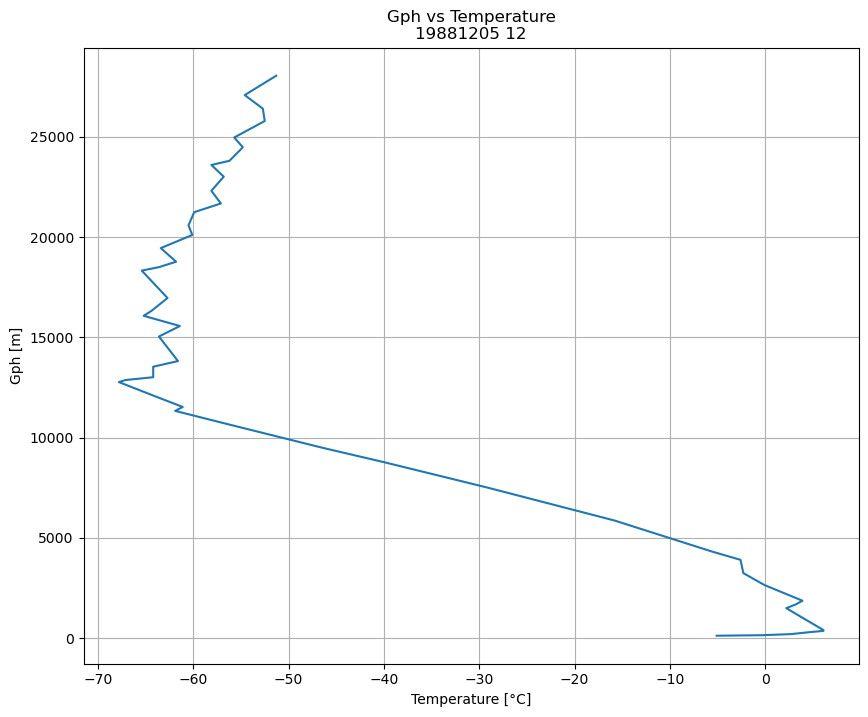

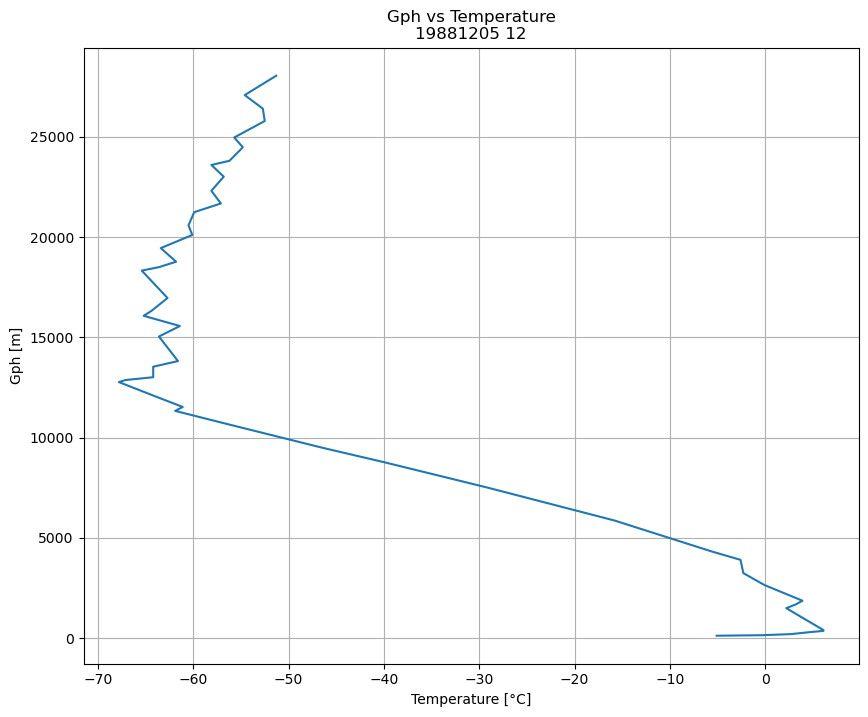

In [5]:
# Plot profile of temperature vs height for a specific date and time
igrat.plot_profile(data, 'temperature', 'height', 19881205, 12)

xarray.Dataset {
dimensions:
	num_profiles = 1 ;
	levels = 214 ;

variables:
	int64 num_profiles(num_profiles) ;
	int32 date(num_profiles) ;
		date:units = YYYYMMDD ;
		date:long_name = Date of sounding ;
	int32 time(num_profiles) ;
		time:units = HH ;
		time:long_name = Time of sounding (UTC) ;
	float32 pressure(num_profiles, levels) ;
		pressure:units = hPa ;
		pressure:long_name = Pressure ;
	float32 gph(num_profiles, levels) ;
		gph:units = m ;
		gph:long_name = Geopotential height ;
	float32 temperature(num_profiles, levels) ;
		temperature:units = C ;
		temperature:long_name = Temperature ;
	float32 rh(num_profiles, levels) ;
		rh:units = % ;
		rh:long_name = Relative humidity ;
	float32 wdir(num_profiles, levels) ;
		wdir:units = degrees from north, 90 = east ;
		wdir:long_name = Wind direction ;
	float32 wspd(num_profiles, levels) ;
		wspd:units = m/s ;
		wspd:long_name = Wind speed ;
	float32 dpdp(num_profiles, levels) ;
		dpdp:units = degrees C ;
		dpdp:long_name = Dew point 

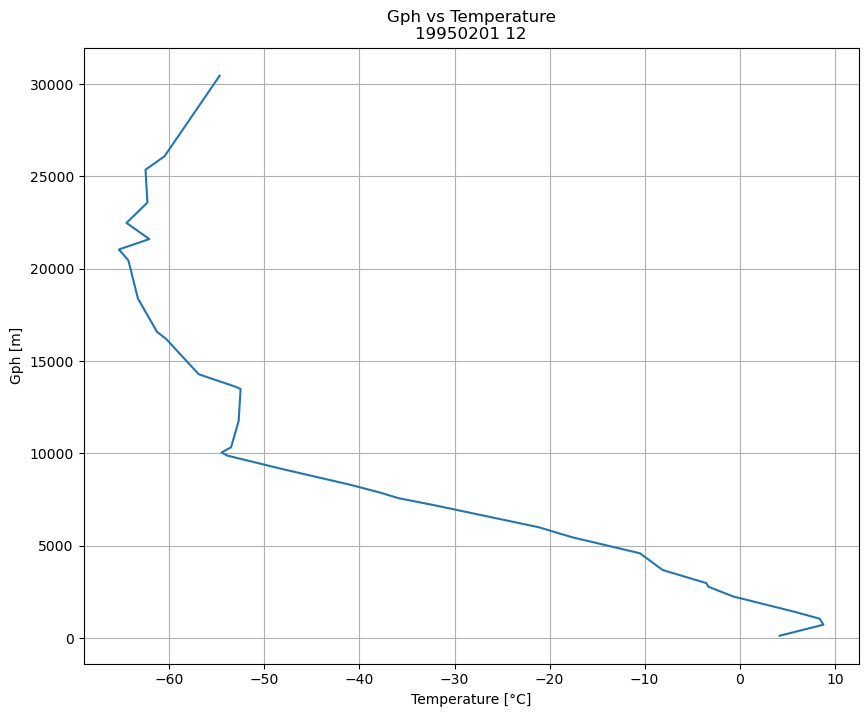

In [6]:
# Isolate a specific date and time
profile = igrat.get_profile(data, 19950201, 12)

profile.info()

# If the data is just a single profile, you can plot it without specifying date and time
fig = igrat.plot_profile(profile, 'temperature', 'height')


xarray.Dataset {
dimensions:
	num_profiles = 1 ;
	levels = 214 ;

variables:
	int64 num_profiles(num_profiles) ;
	int32 date(num_profiles) ;
		date:units = YYYYMMDD ;
		date:long_name = Date of sounding ;
	int32 time(num_profiles) ;
		time:units = HH ;
		time:long_name = Time of sounding (UTC) ;
	float32 pressure(num_profiles, levels) ;
		pressure:units = hPa ;
		pressure:long_name = Pressure ;
	float32 gph(num_profiles, levels) ;
		gph:units = m ;
		gph:long_name = Geopotential height ;
	float32 temperature(num_profiles, levels) ;
		temperature:units = C ;
		temperature:long_name = Temperature ;
	float32 rh(num_profiles, levels) ;
		rh:units = % ;
		rh:long_name = Relative humidity ;
	float32 wdir(num_profiles, levels) ;
		wdir:units = degrees from north, 90 = east ;
		wdir:long_name = Wind direction ;
	float32 wspd(num_profiles, levels) ;
		wspd:units = m/s ;
		wspd:long_name = Wind speed ;
	float32 dpdp(num_profiles, levels) ;
		dpdp:units = degrees C ;
		dpdp:long_name = Dew point 

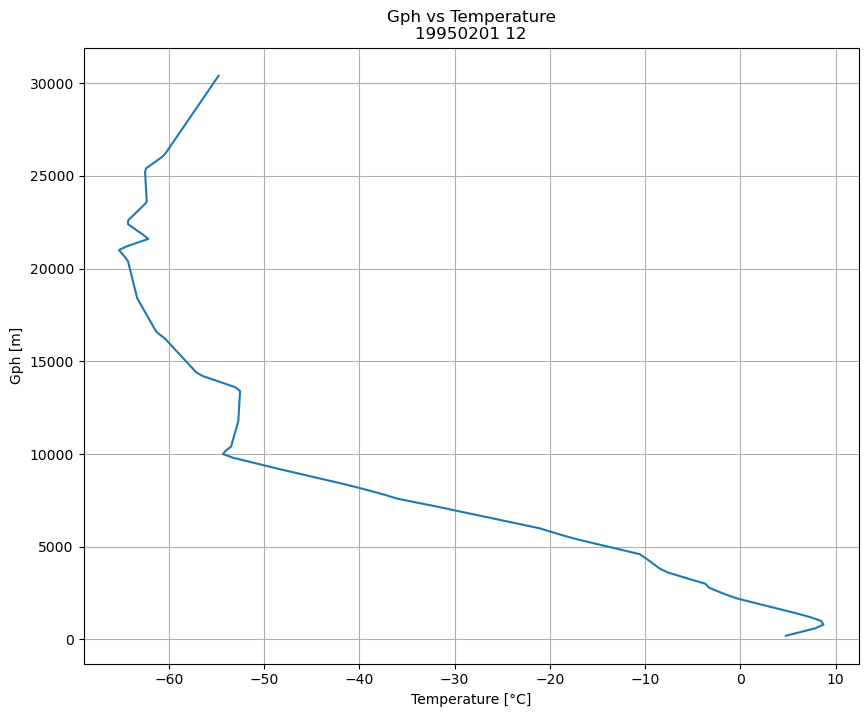

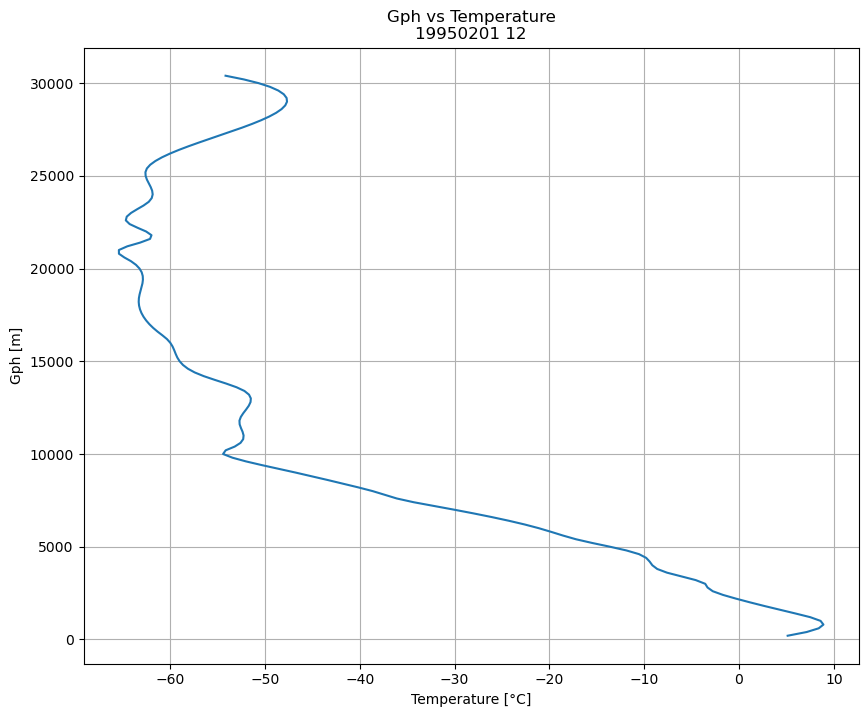

In [10]:
# Linear interpolation of the temperature profile 
interpolated_profile = igrat.interp_data(profile, 'height', 'temperature', 0, 40000, 200, method='linear', fill_value=np.nan)

# Cubic interpolation of the temperature profile 
interpolated_profile_cubic = igrat.interp_data(profile, 'height', 'temperature', 0, 40000, 200, method='cubic', fill_value=np.nan)

profile.info()

# Compare the original and interpolated profiles
original_temperature, original_height = igrat._filter_invalid_values(np.array(profile['temperature']), np.array(profile['gph']))
print(original_temperature)
print(original_height)
print(np.array(interpolated_profile['temperature']))
print(np.array(interpolated_profile['gph']))

# Plot the interpolated profile
fig = igrat.plot_profile(interpolated_profile, 'temperature', 'height')
fig_cubic = igrat.plot_profile(interpolated_profile_cubic, 'temperature', 'height')





[  4.2   8.8   8.4   5.8  -0.7  -3.3  -3.5  -8.1 -10.5 -17.5 -18.3 -21.1
 -32.1 -35.9 -37.9 -41.1 -48.1 -53.9 -54.5 -53.5 -52.7 -52.5 -53.1 -56.9
 -60.3 -61.3 -63.3 -64.3 -65.3 -62.1 -64.5 -62.3 -62.5 -60.5 -54.7 -53.9]
[995.  925.  889.  850.  767.  717.  700.  640.  569.  508.  500.  471.
 400.  378.  361.  339.  300.  268.  261.  250.  200.  153.  150.  135.
 100.   93.6  70.   50.   45.4  41.4  35.9  30.   22.5  20.   10.    8. ]
[[  4.19999981   8.79999825   5.7999972   -3.4999991  -18.30000364
  -48.10000278 -53.49999967 -52.70000071 -53.10000143 -60.3000002
  -63.29999827 -64.30000369 -62.29999927 -60.49999972 -54.70000065]]
[[1000  925  850  700  500  300  250  200  150  100   70   50   30   20
    10]]


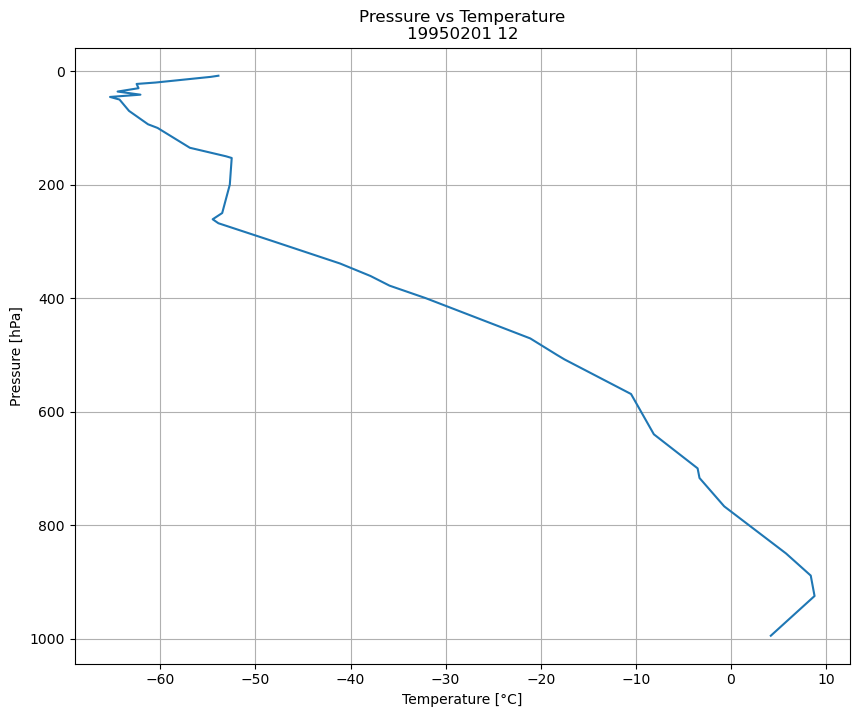

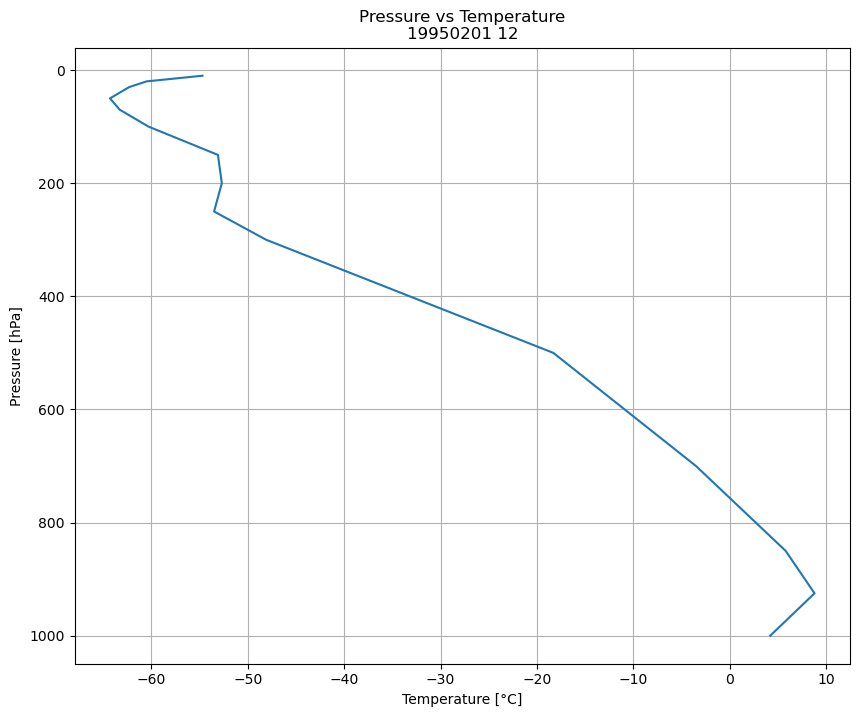

In [11]:
# Interpolate the temperature profile to standardpressure levels
interpolated_profile_pressure = igrat.interp_data_to_pressure_levels(profile, 'temperature')

# Compare the original and interpolated profiles
original_temperature, original_pressure = igrat._filter_invalid_values(np.array(profile['temperature']), np.array(profile['pressure']))
print(original_temperature)
print(original_pressure)
print(np.array(interpolated_profile_pressure['temperature']))
print(np.array(interpolated_profile_pressure['pressure']))

# Plot the original and interpolated profiles
fig = igrat.plot_profile(profile, 'temperature', 'pressure')
fig = igrat.plot_profile(interpolated_profile_pressure, 'temperature', 'pressure')

In [12]:
# Display a map of all stations
igrat.plot_station_map()

# Display a map of all stations colored by elevation
igrat.plot_station_map(color_by='elevation')

# Display a map of all stations colored by first year of data
igrat.plot_station_map(color_by='first_year')

# Display a map of all stations colored by last year of data
igrat.plot_station_map(color_by='last_year')

In [13]:
# Display a map of all stations within the latitude and longitude range, colored by elevation
igrat.plot_station_map(lat_range=(0, 90), lon_range=(-180, 0), color_by='elevation')


In [14]:
# Get all stations within the latitude and longitude range
ny_stations = igrat.filter_stations(lat_range=(40, 45), lon_range=(-75, -70))

print(ny_stations)
fig = igrat.plot_station_map(stations=ny_stations)

['USM00072409', 'USM00072501', 'USM00072503', 'USM00072506', 'USM00072509', 'USM00072518', 'USM00074389', 'USM00074482', 'USM00074486', 'USW00014702', 'USW00014703', 'USW00014704', 'USW00014708', 'USW00014709', 'USW00014710', 'USW00014716', 'USW00014719', 'USW00014721', 'USW00014722', 'USW00014723', 'USW00014725', 'USW00014726', 'USW00014734', 'USW00014742', 'USW00014752', 'USW00014755', 'USW00094730', 'USW00094775']


In [12]:
# Get stations in North America whose records start after 1970 and contain records between 1980-01-01 to 1985-12-31
na_stations = igrat.filter_stations(start_year=1970, lat_range=(30, 50), lon_range=(-130, -70), has_date_range=(19800101, 19851231))

print(f"Found {len(na_stations)} stations in North America whose records start after 1970 and contain records from 1980-01-01 to 1985-12-31: " + str(na_stations))
fig = igrat.plot_station_map(stations=na_stations)

Processing data for station CAM00071203...
Successfully processed data for CAM00071203
Processing data for station CAM00071524...
Successfully processed data for CAM00071524
Processing data for station CAM00071621...
Successfully processed data for CAM00071621
Processing data for station CAM00071625...
Successfully processed data for CAM00071625
Processing data for station CAM00071627...
Successfully processed data for CAM00071627
Processing data for station CAM00071716...
Successfully processed data for CAM00071716
Processing data for station CAM00071843...
Successfully processed data for CAM00071843
Processing data for station CAM00071851...
Successfully processed data for CAM00071851
Processing data for station CAM00071852...
Successfully processed data for CAM00071852
Processing data for station CAM00071874...
Successfully processed data for CAM00071874
Processing data for station CAM00071892...
Successfully processed data for CAM00071892
Processing data for station CAM00071893...


In [14]:
# Get stations whose records start after 1970 and contain records between 1980-01-01 to 1990-12-31
stations = igrat.filter_stations(start_year=1970, has_date_range=(19800101, 19901231), availability_dir='availability')
# availability_dir is the directory that contains the availability data. If this is not provided, the availability data will be downloaded and parsed in memory. 
# To save time, it is recommended to make this directory and download all the availability data (about 4GB) at once. This can be done by running 
# igrat.get_availability_json_batch('availability')
# This will download the availability data for all stations and save it to the 'availability' directory. 
# You can then provide the directory to this function to avoid downloading the data every time igrat.filter_stations is called.

print(f"Found {len(stations)} stations in North America whose records start after 1970 and contain records from 1980-01-01 to 1990-12-31: " + str(na_stations))
fig = igrat.plot_station_map(stations=stations)

Found 795 stations in North America whose records start after 1970 and contain records from 1980-01-01 to 1990-12-31: ['CAM00071627', 'CAM00071716', 'CAM00071852', 'CAM00071874', 'CAM00071892', 'USM00072229', 'USM00072239', 'USM00072247', 'USM00072260', 'USM00072349', 'USM00072407', 'USM00072468', 'USM00074531', 'USM00074618', 'USM00074619', 'USM00074693', 'USM00074695', 'USM00074724', 'USM00074755', 'USM00074778', 'USM00074780', 'USM00074792', 'USXUA026560', 'USXUA026640', 'USXUA026660']
